In [ ]:
from torchvision import datasets
data_path = 'data'
mnist_val = datasets.MNIST(data_path, train=False, download=True,)

image, label = mnist_val[0]


100%|██████████| 9912422/9912422 [00:00<00:00, 35865184.79it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34659712.11it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27883510.72it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5571959.28it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



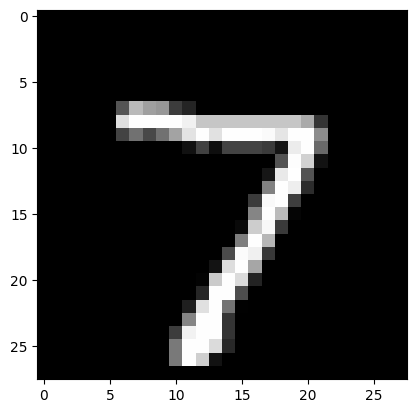

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

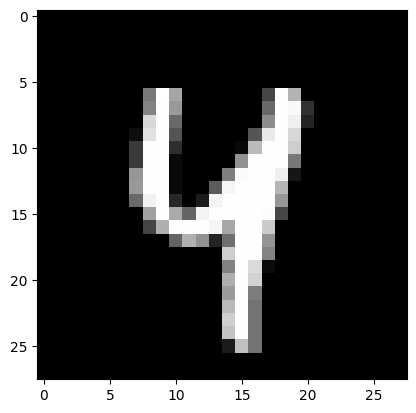

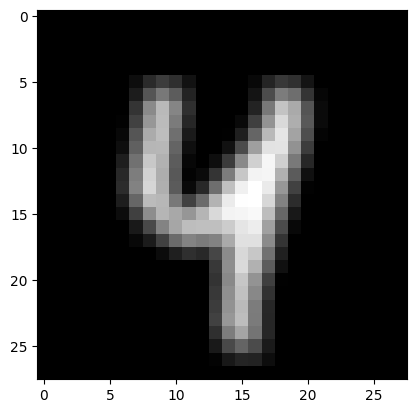

In [ ]:
import numpy as np
import cv2

weight = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

filtered = cv2.filter2D(src=np.array(image), ddepth=-1, kernel=weight)

plt.figure()
plt.imshow(image, cmap='gray')
plt.figure()
plt.imshow(filtered, cmap='gray')

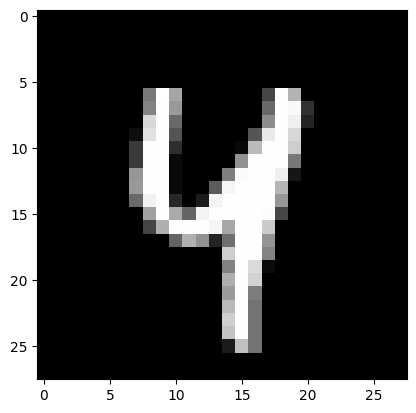

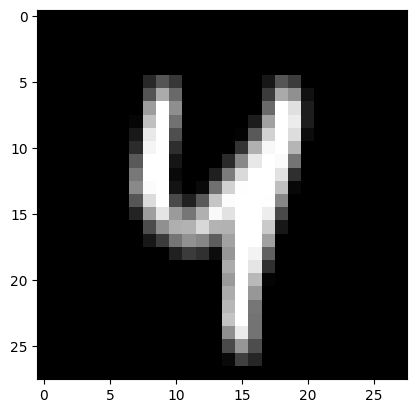

In [ ]:
import numpy as np
import cv2

weight = np.array([[0/9, 3/9, 0/9],
                   [0/9, 3/9, 0/9],
                   [0/9, 3/9, 0/9]])

filtered = cv2.filter2D(src=np.array(image), ddepth=-1, kernel=weight)

plt.figure()
plt.imshow(image, cmap='gray')
plt.figure()
plt.imshow(filtered, cmap='gray')

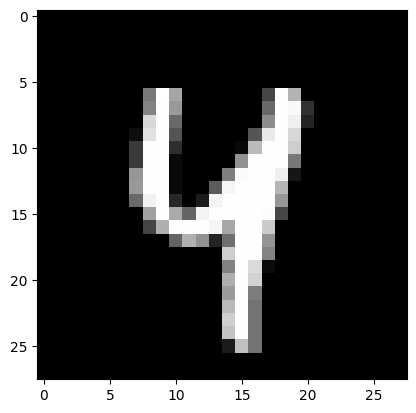

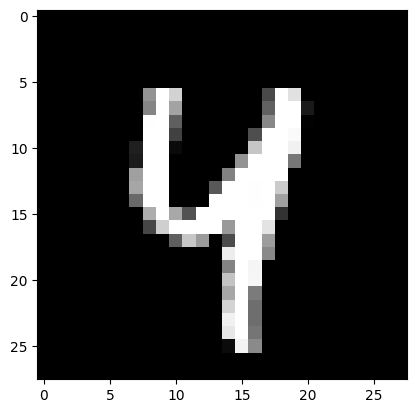

In [ ]:
import numpy as np
import cv2

weight = np.array([[-1/9, 0/9, -1/9],
                   [0/9, 13/9, 0/9],
                   [-1/9, 0/9, -1/9]])

filtered = cv2.filter2D(src=np.array(image), ddepth=-1, kernel=weight)

plt.figure()
plt.imshow(image, cmap='gray')
plt.figure()
plt.imshow(filtered, cmap='gray')

(28, 28)


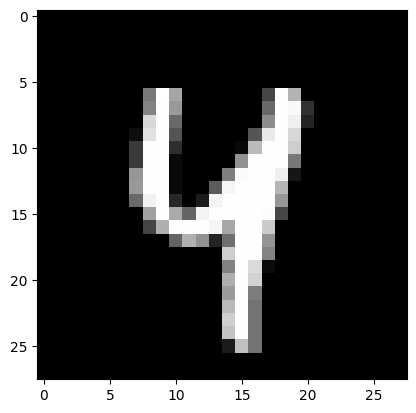

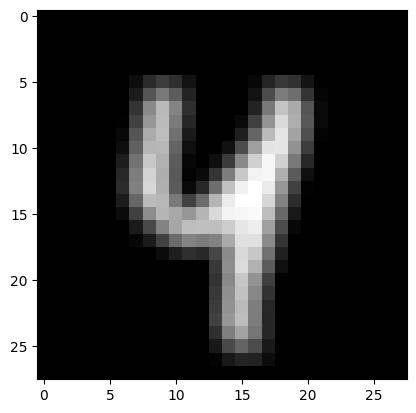

In [ ]:
import torch
from torch import nn

conv = nn.Conv2d(in_channels=1, out_channels=1,
                 kernel_size=3, padding=1, stride=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor(
                   [[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
    conv.bias.zero_()

from torchvision import transforms
image_as_tensor = transforms.ToTensor()(image)
convolution = conv(image_as_tensor).detach().numpy()[0]

plt.figure()
plt.imshow(image, cmap='gray')
plt.figure()
plt.imshow(convolution, cmap='gray')